## Feature Engineering & Data Preprocessing Demo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

# load CHN data
df_chn = pd.read_csv('demo.csv')

df_chn.head(10)

,Unnamed: 0,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,Yes,No,1.0,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,No,No,45.0,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,5,9305-CDSKC,Female,No,No,8.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,6,1452-KIOVK,Male,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,7,6713-OKOMC,Female,No,No,-,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,NaN,301.9,No
8,8,7892-POOKP,Female,Yes,No,28.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,204.80,3046.05,Yes
9,9,6388-TABGU,Male,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [2]:
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11234 entries, 0 to 11233
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11234 non-null  int64  
 1   customerID        11234 non-null  object 
 2   gender            11234 non-null  object 
 3   Partner           11234 non-null  object 
 4   Dependents        11234 non-null  object 
 5   tenure            9526 non-null   object 
 6   PhoneService      11234 non-null  object 
 7   MultipleLines     11234 non-null  object 
 8   InternetService   11234 non-null  object 
 9   OnlineSecurity    11234 non-null  object 
 10  OnlineBackup      11234 non-null  object 
 11  DeviceProtection  11234 non-null  object 
 12  TechSupport       11234 non-null  object 
 13  StreamingTV       11234 non-null  object 
 14  StreamingMovies   11234 non-null  object 
 15  Contract          11234 non-null  object 
 16  PaperlessBilling  11234 non-null  object

Remove unnecessary columns

In [3]:
cols_to_remove = ['customerID', 'Unnamed: 0']
df_chn.drop(cols_to_remove, axis=1, inplace=True)

df_chn.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1.0,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,45.0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Put columns into consistent format

In [4]:
fix_cols = ['tenure', 'TotalCharges']

# convert to numeric
df_chn[fix_cols] = df_chn[fix_cols].apply(pd.to_numeric, errors='coerce')

# check if conversion is successful
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11234 entries, 0 to 11233
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            11234 non-null  object 
 1   Partner           11234 non-null  object 
 2   Dependents        11234 non-null  object 
 3   tenure            8988 non-null   float64
 4   PhoneService      11234 non-null  object 
 5   MultipleLines     11234 non-null  object 
 6   InternetService   11234 non-null  object 
 7   OnlineSecurity    11234 non-null  object 
 8   OnlineBackup      11234 non-null  object 
 9   DeviceProtection  11234 non-null  object 
 10  TechSupport       11234 non-null  object 
 11  StreamingTV       11234 non-null  object 
 12  StreamingMovies   11234 non-null  object 
 13  Contract          11234 non-null  object 
 14  PaperlessBilling  11234 non-null  object 
 15  PaymentMethod     11234 non-null  object 
 16  MonthlyCharges    8988 non-null   float6

Checking missing values

In [5]:
df_chn.isna().sum()

gender                 0
Partner                0
Dependents             0
tenure              2246
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges      2246
TotalCharges          22
Churn                  0
dtype: int64

Checking duplicated values

In [6]:
df_chn.duplicated().sum()

22

Handling Duplicated Values
- Removing duplicated rows

In [7]:
# drop duplicated rows
df_chn.drop_duplicates(inplace=True)

df_chn.duplicated().sum()

0

Visualize numerical columns with boxplot

In [8]:
num_cols = ['MonthlyCharges', 'tenure', 'TotalCharges']

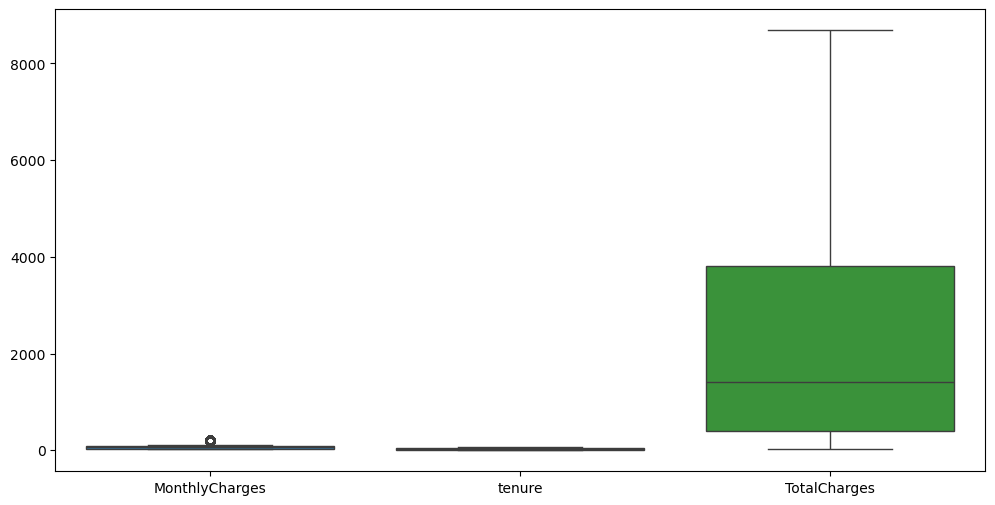

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_chn[num_cols])
plt.show()

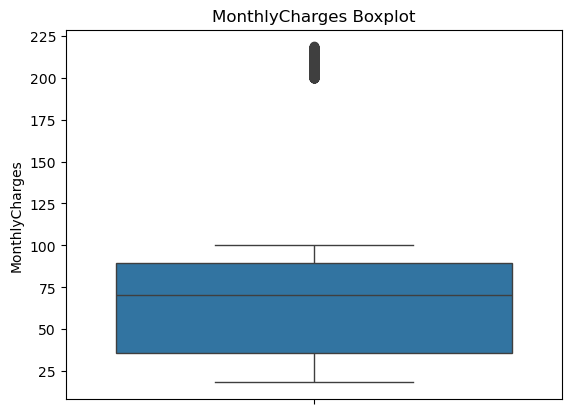

In [10]:
sns.boxplot(data=df_chn['MonthlyCharges'])
plt.title('MonthlyCharges Boxplot')
plt.show()

Visualize numerical columns with Histogram Plot

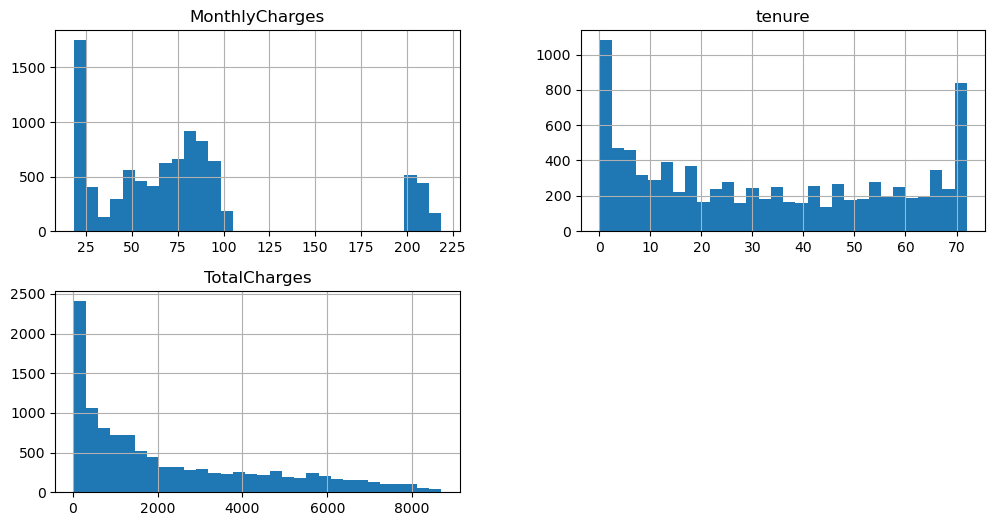

In [11]:
df_chn[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()


Reducing Outliers by Log-transforming `MonthlyCharges` column

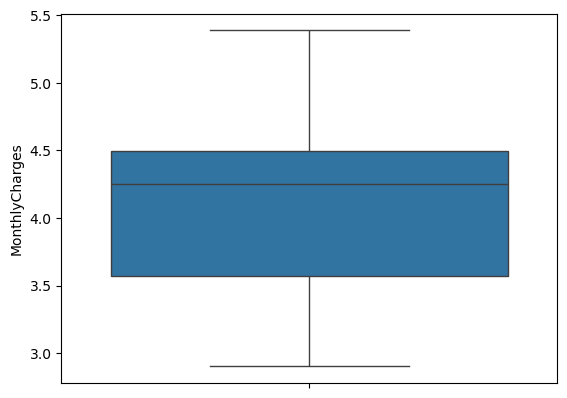

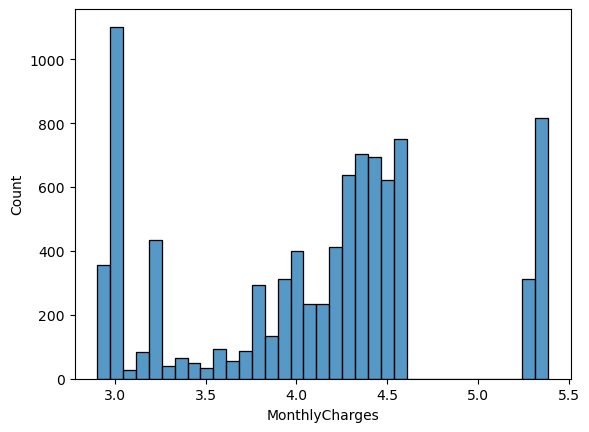

In [12]:
df_chn['MonthlyCharges'] = np.log(df_chn['MonthlyCharges'])

sns.boxplot(df_chn['MonthlyCharges'])
plt.show()

sns.histplot(df_chn['MonthlyCharges'], bins=35)
plt.show()

Split data into train & test to avoid data leakage

In [13]:
# Split data into training and testing sets
X = df_chn.drop('Churn', axis=1)
y = df_chn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8969, 18), (2243, 18), (8969,), (2243,))

In [14]:
df_chn.isna().sum()

gender                 0
Partner                0
Dependents             0
tenure              2235
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges      2234
TotalCharges          22
Churn                  0
dtype: int64

Feature Scaling (numerical column only!!)

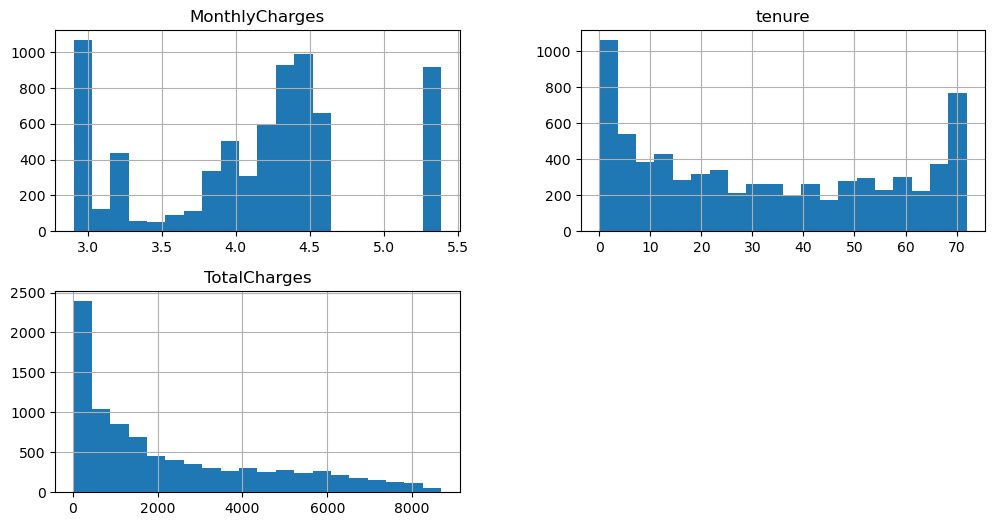

In [15]:
X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

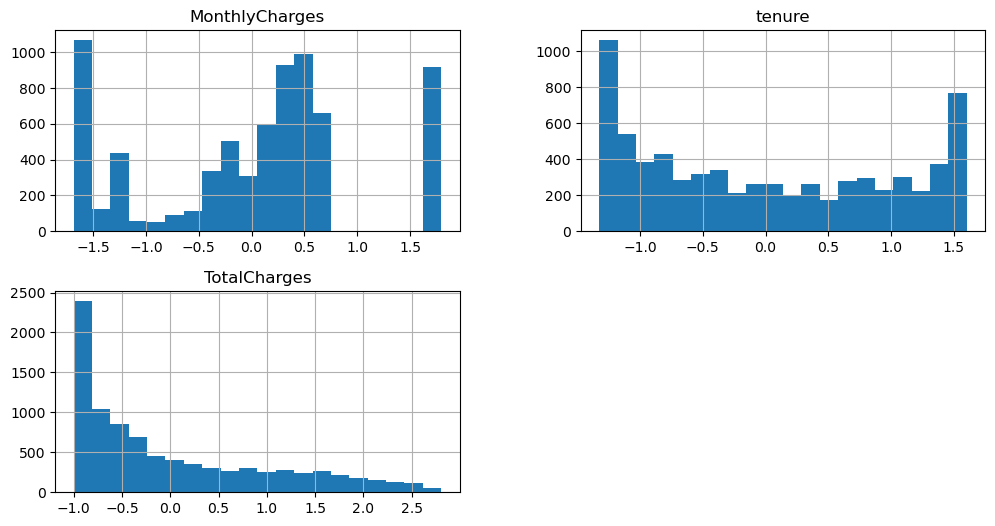

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

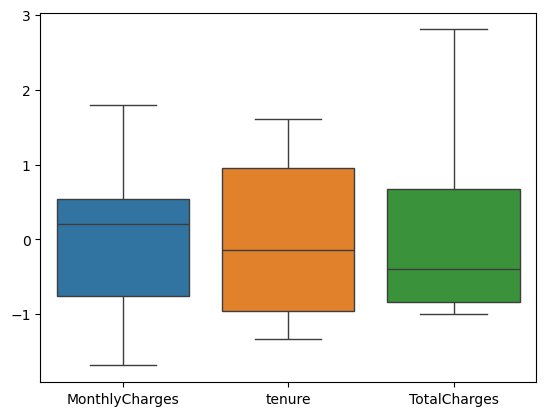

In [17]:
sns.boxplot(data=X_train[num_cols])
plt.show()

Handling Missing Values

In [18]:
X_train.isna().sum() / len(X_train)


gender              0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.196343
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.199576
TotalCharges        0.001895
dtype: float64

In [19]:
X_test.isna().sum() / len(X_test)

gender              0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.211324
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.197949
TotalCharges        0.002229
dtype: float64

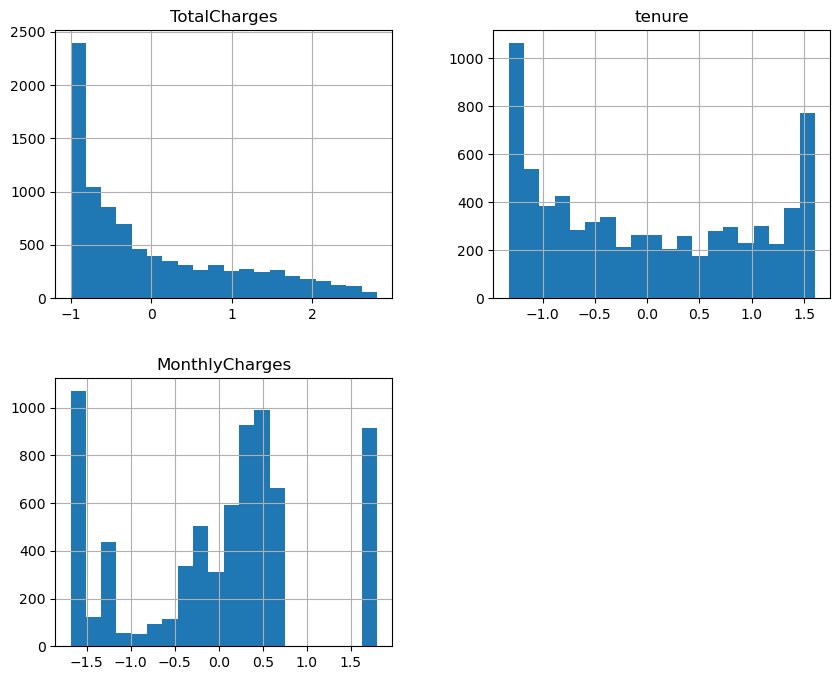

In [20]:
X_train[['TotalCharges', 'tenure', 'MonthlyCharges']].hist(bins=20, figsize=(10, 8))
plt.show()

Check Skewness

In [21]:
X_train['TotalCharges'].skew(), X_train['tenure'].skew(), X_train['MonthlyCharges'].skew()

(0.9507266903399139, 0.2292327974298211, -0.08279871115514821)

Missing Value imputation

In [22]:
X_train['TotalCharges'].fillna(X_train['TotalCharges'].median(), inplace=True)
X_test['TotalCharges'].fillna(X_test['TotalCharges'].median(), inplace=True)

X_train['tenure'].fillna(X_train['tenure'].mean(), inplace=True)
X_test['tenure'].fillna(X_test['tenure'].mean(), inplace=True)

X_train['MonthlyCharges'].fillna(X_train['MonthlyCharges'].mean(), inplace=True)
X_test['MonthlyCharges'].fillna(X_test['MonthlyCharges'].mean(), inplace=True)


X_train.isna().sum() / len(X_train)

gender              0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
dtype: float64

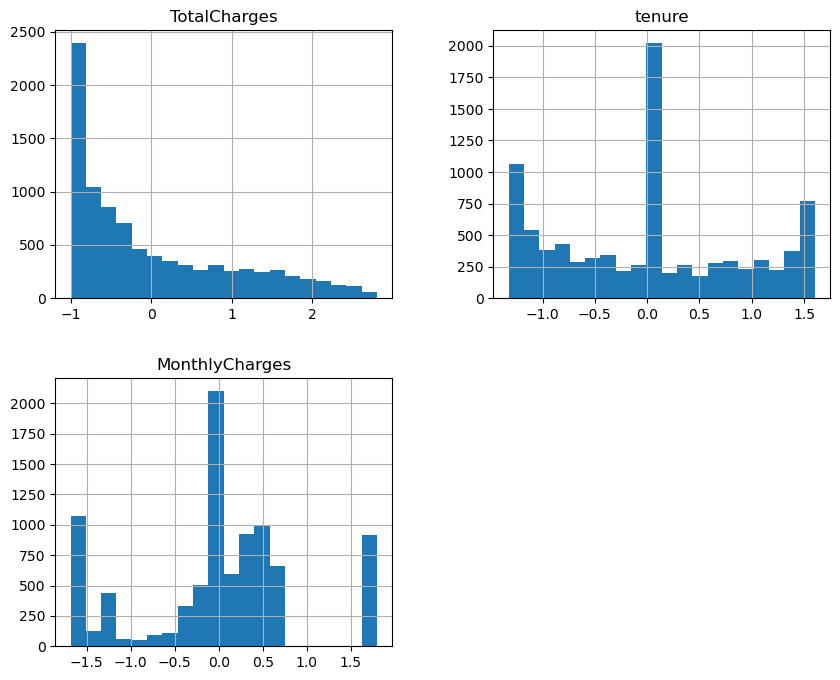

In [23]:
X_train[['TotalCharges', 'tenure', 'MonthlyCharges']].hist(bins=20, figsize=(10, 8))
plt.show()

In [24]:
print(X_test.isna().sum())

gender              0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


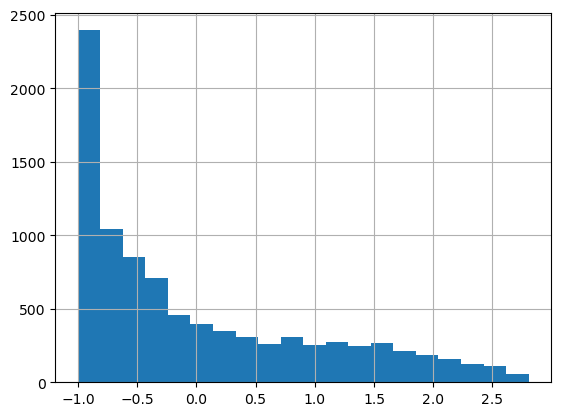

In [25]:
X_train['TotalCharges'].hist(bins=20)
plt.show()


In [26]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(X_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
gender
Male      4538
Female    4431
Name: count, dtype: int64
--------------------------------------------------
Partner
No     4641
Yes    4237
yEs      91
Name: count, dtype: int64
--------------------------------------------------
Dependents
No     6211
Yes    2586
no      118
yeS      54
Name: count, dtype: int64
--------------------------------------------------
PhoneService
Yes    8097
No      872
Name: count, dtype: int64
--------------------------------------------------
MultipleLines
No     5141
Yes    3828
Name: count, dtype: int64
--------------------------------------------------
InternetService
Fiber optic    3940
DSL            3059
No             1970
Name: count, dtype: int64
--------------------------------------------------
OnlineSecurity
No                     4347
Yes                    2517
No internet service    1970
no                       86
yeS                      49
Name: count, dtype: int64
---------------

In [27]:
# Partner (yEs -> Yes)
X_train['Partner'].replace({'yEs': 'Yes'}, inplace=True)
X_test['Partner'].replace({'yEs': 'Yes'}, inplace=True)

# Dependents (yeS -> Yes, no -> No)
X_train['Dependents'].replace({'yeS': 'Yes', 'no': 'No'}, inplace=True)
X_test['Dependents'].replace({'yeS': 'Yes', 'no': 'No'}, inplace=True)

# OnlineSecurity (no -> No, No internet service -> No, yeS -> Yes)
X_train['OnlineSecurity'].replace({'no': 'No', 'No internet service': 'No', 'yeS': 'Yes'}, inplace=True)
X_test['OnlineSecurity'].replace({'no': 'No', 'No internet service': 'No', 'yeS': 'Yes'}, inplace=True)

# OnlineBackup (no -> No, No internet service -> No, yeS -> Yes)
X_train['OnlineBackup'].replace({'no': 'No', 'No internet service': 'No', 'yeS': 'Yes'}, inplace=True)
X_test['OnlineBackup'].replace({'no': 'No', 'No internet service': 'No', 'yeS': 'Yes'}, inplace=True)

In [28]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(X_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
gender
Male      4538
Female    4431
Name: count, dtype: int64
--------------------------------------------------
Partner
No     4641
Yes    4328
Name: count, dtype: int64
--------------------------------------------------
Dependents
No     6329
Yes    2640
Name: count, dtype: int64
--------------------------------------------------
PhoneService
Yes    8097
No      872
Name: count, dtype: int64
--------------------------------------------------
MultipleLines
No     5141
Yes    3828
Name: count, dtype: int64
--------------------------------------------------
InternetService
Fiber optic    3940
DSL            3059
No             1970
Name: count, dtype: int64
--------------------------------------------------
OnlineSecurity
No     6403
Yes    2566
Name: count, dtype: int64
--------------------------------------------------
OnlineBackup
No     5854
Yes    3115
Name: count, dtype: int64
--------------------------------------------------
De

Categorical Encoding

In [29]:
# one hot encode

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

X_train.head()


,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
9530,7.502471e-01,-8.033799e-01,-0.226969,False,True,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
10595,-1.439224e-16,3.721221e-01,0.568982,False,False,False,True,True,False,False,...,True,False,True,True,False,True,False,False,False,True
5373,1.562358e+00,1.704932e+00,2.193547,True,True,False,True,False,True,False,...,True,True,True,True,False,True,True,False,True,False
7280,1.237255e+00,-5.473327e-16,1.043772,True,True,True,True,False,False,False,...,True,True,True,False,False,True,False,True,False,False
4826,-9.989193e-01,1.706636e+00,-0.645395,False,False,False,True,True,True,False,...,True,False,True,True,False,False,True,False,True,False


In [30]:
X_train.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Label Encoding Target Values

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train


array([0, 0, 0, ..., 0, 0, 0])

In [32]:
print(f'Train Label  \n{pd.Series(y_train).value_counts()}')
print()
print(f'Test Label \n{pd.Series(y_test).value_counts()}')

Train Label  
0    6623
1    2346
Name: count, dtype: int64

Test Label 
0    1666
1     577
Name: count, dtype: int64


In [33]:
X_train

,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
9530,7.502471e-01,-8.033799e-01,-0.226969,False,True,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
10595,-1.439224e-16,3.721221e-01,0.568982,False,False,False,True,True,False,False,...,True,False,True,True,False,True,False,False,False,True
5373,1.562358e+00,1.704932e+00,2.193547,True,True,False,True,False,True,False,...,True,True,True,True,False,True,True,False,True,False
7280,1.237255e+00,-5.473327e-16,1.043772,True,True,True,True,False,False,False,...,True,True,True,False,False,True,False,True,False,False
4826,-9.989193e-01,1.706636e+00,-0.645395,False,False,False,True,True,True,False,...,True,False,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5740,1.481047e+00,-6.160724e-01,0.211247,True,True,True,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
5195,1.603013e+00,2.975695e-01,1.334510,True,False,False,True,False,False,False,...,True,True,True,False,False,True,True,False,False,False
5394,6.272884e-01,1.703909e+00,1.223452,False,True,False,True,True,True,False,...,False,True,True,True,False,False,True,True,False,False
860,-2.671258e-01,-1.568548e+00,-0.808930,True,False,False,True,False,False,True,...,False,False,False,False,True,False,False,True,False,False


In [34]:
# merge label with feature
X_train['Churn'] = y_train
X_test['Churn'] = y_test

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8969 entries, 9530 to 7282
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 8969 non-null   float64
 1   MonthlyCharges                         8969 non-null   float64
 2   TotalCharges                           8969 non-null   float64
 3   gender_Male                            8969 non-null   bool   
 4   Partner_Yes                            8969 non-null   bool   
 5   Dependents_Yes                         8969 non-null   bool   
 6   PhoneService_Yes                       8969 non-null   bool   
 7   MultipleLines_Yes                      8969 non-null   bool   
 8   InternetService_Fiber optic            8969 non-null   bool   
 9   InternetService_No                     8969 non-null   bool   
 10  OnlineSecurity_Yes                     8969 non-null   bool   
 11  Online

In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 4566 to 8929
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 2243 non-null   float64
 1   MonthlyCharges                         2243 non-null   float64
 2   TotalCharges                           2243 non-null   float64
 3   gender_Male                            2243 non-null   bool   
 4   Partner_Yes                            2243 non-null   bool   
 5   Dependents_Yes                         2243 non-null   bool   
 6   PhoneService_Yes                       2243 non-null   bool   
 7   MultipleLines_Yes                      2243 non-null   bool   
 8   InternetService_Fiber optic            2243 non-null   bool   
 9   InternetService_No                     2243 non-null   bool   
 10  OnlineSecurity_Yes                     2243 non-null   bool   
 11  Online

In [37]:
print("Train missing data:", X_train.isna().sum().sum(), "\nTest missing data:", X_test.isna().sum().sum())
print()
print("Train duplicated data:", X_train.duplicated().sum(), "\nTest duplicated data:", X_test.duplicated().sum())


Train missing data: 0 
Test missing data: 0

Train duplicated data: 0 
Test duplicated data: 0


### Done!